# EDA-数据探索性分析

因为自己是医学生，自己逐渐摸索，就这一次零基础参赛，想把比赛理念运用到医学领域，把比赛数据给的代码，跑一跑自己的课题部分项目
* 熟悉数据集、了解数据集
* 了解变量间的相互关系以及变量与预测值之间的存在关系
* 数据处理以及特征工程的步骤，使数据集的结构和特征集让接下来的预测问题更加可靠
* 完成对数据的探索性分析

## 1.数据载入和可视化

In [68]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [69]:
## 通过Pandas对于数据进行读取 (pandas是一个很友好的数据读取函数库)
Train_data = pd.read_csv('train.csv', sep=',')
Test_data = pd.read_csv('test.csv', sep=',')
## 输出数据的大小信息
print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train data shape: (4048, 66)
TestA data shape: (1737, 66)


In [70]:
## 2) 简略观察数据(head()+shape)
Train_data.head().append(Train_data.tail())

,positiveculture_poe,age,is_male,race_black,race_white,race_hispanic,race_other,height,weight,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,lactate_min,lactate_max,platelet_min,platelet_max,potassium_min,potassium_max,ptt_min,ptt_max,inr_min,inr_max,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,diasbp_max,diasbp_mean,meanbp_min,meanbp_max,meanbp_mean,resprate_min,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_mean,icu_los
0,0,45.7505,1,0,0,0,1,178.00,250.0,11,16,25.0,27,2.9,5.9,0.8,0.9,101,103,220,237,47.4,49.8,17.5,18.2,1.8,4.4,177,253,3.8,4.0,24.2,24.2,1.2,1.2,14.2,14.2,137,138,12,15,14.0,15.6,89,106,98.260870,128.0,156,145.850000,78,96,88.850000,90,109,101.900000,19,29,24.347826,37.666667,38.555556,38.101852,92,96,94.695652,196.700000,2.0142
1,0,83.6432,0,0,1,0,0,160.00,58.1,15,16,15.0,17,4.9,4.9,0.7,0.9,106,108,72,108,31.7,32.5,11.2,11.4,1.4,2.1,131,140,3.0,4.8,45.0,95.0,3.4,5.4,33.1,46.9,132,137,12,15,30.7,30.7,62,91,77.076923,83.0,169,108.500000,33,79,51.148148,49,113,69.000000,11,33,21.135135,36.055556,36.500000,36.314815,96,100,98.558824,90.000000,2.0708
2,0,64.3080,1,0,1,0,0,177.80,95.1,8,12,22.0,24,0.7,0.7,0.6,0.8,108,112,96,226,30.7,42.4,10.5,14.3,1.4,2.2,152,216,3.8,4.0,134.8,150.0,1.8,2.5,42.0,51.3,138,140,31,36,10.9,12.3,81,143,121.586207,74.0,129,100.925926,38,88,60.666667,51,94,70.407407,15,40,24.212121,36.222222,37.444444,37.027778,90,99,94.310345,170.000000,4.2641
3,1,56.5050,1,0,1,0,0,182.88,113.4,14,16,27.0,28,0.8,0.9,1.4,1.7,94,105,85,135,36.8,40.0,13.2,14.2,0.9,1.3,145,174,3.9,4.3,23.5,24.5,1.0,1.1,11.8,12.8,134,143,31,40,9.2,10.8,46,73,64.227273,91.0,179,113.761905,49,144,67.238095,59,153,78.047619,9,23,16.954545,37.277778,37.388889,37.333333,91,100,95.454545,135.500000,0.9250
4,1,69.3102,0,0,1,0,0,165.10,101.0,13,13,26.0,26,0.9,0.9,0.5,0.7,102,103,137,163,34.7,41.0,12.4,13.6,1.3,1.3,184,251,3.3,3.5,22.9,33.5,1.1,1.5,13.2,17.1,138,141,10,16,13.0,16.0,50,71,60.692308,126.0,178,148.270270,40,58,49.621622,62,83,72.837838,15,25,20.700000,36.611111,38.111111,37.475309,95,100,98.974359,134.000000,8.2287
4043,0,64.3519,1,1,0,0,0,193.04,154.0,10,13,27.0,33,0.3,0.2,0.7,0.9,90,97,105,144,35.0,37.0,11.4,11.5,1.3,1.3,424,424,3.0,4.2,27.9,27.9,1.4,1.4,16.3,16.3,127,136,5,7,6.9,6.9,103,142,120.222222,85.0,153,131.772727,50,104,81.500000,65,112,93.545455,25,34,29.407407,36.333333,37.500000,36.788889,85,100,93.083333,152.833333,2.5029
4044,0,51.4180,1,0,0,0,1,175.00,83.0,16,21,29.0,42,25.5,30.0,5.7,7.5,65,91,91,127,23.1,30.9,8.2,10.7,2.2,1.5,145,236,3.1,3.2,41.8,108.7,1.7,1.9,18.9,20.9,125,134,81,107,12.1,15.4,73,94,84.675000,74.0,121,101.405405,31,66,41.567568,45,73,56.378378,12,33,21.375000,35.000000,36.666667,35.711852,90,100,97.375000,108.000000,5.2939
4045,0,80.4261,0,0,1,0,0,152.40,57.6,16,22,17.0,18,0.7,0.7,3.8,3.9,98,103,117,147,24.1,28.5,7.4,8.8,0.8,1.2,103,125,5.5,6.0,31.1,31.5,1.1,7.0,12.2,69.9,131,131,18,72,5.5,5.7,61,88,69.259259,101.0,158,131.380952,36,63,51.952381,54,86,71.476190,13,25,18.074074,36.277778,37.055556,36.600000,92,100,97.740741,144.800000,2.7523
4046,0,76.4808,1,1,0,0,0,175.00,95.0,14,14,24.0,26,0.4,0.4,1.2,1.4,103,105,92,117,24.6,27.2,7.8,8.6,1.1,1.2,200,212,3.4,4.0,37.7,37.7,1.2,1.2,13.9,13.9,138,140,14,18,5.9,7.4,67,123,99.400000,118.0,169,142.153846,50,113,69.769231,68,122,86.384615,13,39,20.866667,37.000000,37.500000,37.194444,88,100,96.866667,104.000000,0.6203
4047,0,91.4000,0,0,1,0,0,162.56,60.5,12,13,26.0,28,0.4,0.6,1.2,1.2,99,101,94,99,21.0,23.5,7.2,8.1,1.3,1.3,52,132,3.7,4.2,26.9,26.9,1.1,1.1,13.1,13.1,135,136,26,29,0.7,4.1,68,88,77.307692,112.0,168,132.500000,31,99,50.727273,50,103,69.000000,14,24,18.538462,36.611111,37.166667,36.822222,95,100,97.541667

In [71]:
Train_data.shape

(4048, 66)

In [72]:
Test_data.head().append(Test_data.tail())

,positiveculture_poe,age,is_male,race_black,race_white,race_hispanic,race_other,height,weight,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,lactate_min,lactate_max,platelet_min,platelet_max,potassium_min,potassium_max,ptt_min,ptt_max,inr_min,inr_max,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,diasbp_max,diasbp_mean,meanbp_min,meanbp_max,meanbp_mean,resprate_min,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_mean,icu_los
0,0,73.4800,0,1,0,0,0,163.00,87.00,15,23,20,23.0,1.1,1.4,1.1,1.4,102,106,248,304,34.8,40.7,11.5,13.0,1.7,4.0,172,188,4.3,9.7,19.7,22.9,1.0,1.1,11.8,12.6,135,139,18,23,12.2,17.1,75,90,81.068966,109,183,149.562500,48,97,64.718750,67,117,89.250000,13.0,26,20.827586,36.000000,36.722222,36.416667,95,100,99.482759,224.000000,9.0166
1,0,58.3969,1,0,1,0,0,183.00,108.00,10,15,24,27.0,0.6,0.8,0.8,1.0,102,105,116,124,20.3,24.2,7.6,8.9,2.0,2.0,29,88,3.5,3.9,28.2,30.9,1.4,1.5,15.9,17.0,137,138,13,16,0.7,1.2,77,100,85.416667,112,169,148.333333,36,85,71.428571,51,104,88.909091,12.0,23,19.000000,37.000000,38.222222,37.666667,90,99,94.041667,144.000000,1.8369
2,0,52.1983,1,0,1,0,0,188.00,87.10,13,16,21,23.0,38.5,39.5,0.9,1.0,108,110,144,185,34.3,39.1,12.1,13.9,1.6,2.5,218,259,3.3,4.0,25.4,25.4,1.2,1.2,13.9,13.9,140,143,18,18,15.1,20.7,69,109,84.666667,123,164,139.625000,50,79,60.458333,21,108,82.541667,11.0,24,17.666667,37.388889,38.500000,37.722222,95,100,98.800000,157.600000,1.6922
3,0,77.4829,1,0,1,0,0,171.45,81.10,15,15,19,20.0,0.3,1.1,0.8,0.9,98,102,53,84,38.6,41.0,12.7,13.8,1.1,3.1,298,343,4.5,4.5,25.5,32.4,0.9,1.1,11.0,12.7,131,134,13,13,4.1,8.4,64,124,102.458333,83,138,105.960000,47,92,61.440000,45,104,74.080000,15.0,35,24.600000,35.111111,38.611111,37.611111,88,100,98.076923,81.272727,13.7758
4,0,59.7001,0,0,1,0,0,170.18,82.00,9,12,26,28.0,0.5,0.5,1.2,1.3,102,104,124,163,26.7,27.8,8.7,9.3,0.8,1.6,202,285,4.5,5.8,21.6,25.0,1.2,1.3,13.7,14.8,133,137,20,23,9.5,16.3,76,93,84.400000,100,153,132.576923,50,96,68.153846,65,112,90.000000,13.0,24,19.407407,37.666667,38.111111,37.936508,97,100,99.192308,138.666667,1.8080
1732,0,72.3904,0,0,0,0,1,160.02,80.00,14,18,22,23.0,0.4,0.4,1.0,1.0,102,106,107,129,27.1,34.3,9.0,11.1,2.6,5.5,420,548,3.5,3.6,26.5,26.5,1.1,1.1,13.3,13.4,138,139,9,10,10.3,16.6,80,121,96.695652,91,186,130.708333,44,104,70.083333,56,127,88.208333,6.0,20,15.043478,36.000000,37.444444,36.952381,96,99,97.789474,118.000000,1.2361
1733,0,57.6494,0,0,1,0,0,165.10,68.95,10,13,23,25.0,0.5,0.5,0.5,0.8,105,113,94,194,25.0,40.0,8.4,13.3,1.7,1.7,94,192,3.6,4.8,26.7,128.0,1.1,1.3,13.1,14.7,137,142,11,18,5.0,8.8,56,74,61.027778,77,156,102.258065,41,80,60.064516,51,95,69.838710,12.0,26,15.783784,35.777778,36.555556,36.055556,92,100,95.918919,109.400000,1.9475
1734,0,22.9327,1,0,1,0,0,178.00,79.00,13,18,16,27.0,1.4,3.4,0.7,1.1,99,110,100,156,25.6,44.0,8.9,14.7,2.3,4.7,210,289,2.9,4.3,22.4,27.5,1.1,1.3,13.1,14.5,132,142,10,20,20.9,26.1,55,80,69.782609,109,164,141.500000,31,69,59.636364,48,97,80.818182,13.0,18,15.689655,37.000000,37.666667,37.324074,99,100,99.956522,130.777778,4.3775
1735,0,75.9332,0,0,0,0,1,150.00,62.10,11,20,22,25.0,0.5,0.5,0.7,0.8,98,107,104,194,37.2,41.9,11.5,13.4,0.9,6.1,293,317,3.4,3.6,28.4,43.1,1.2,1.1,13.0,13.8,136,140,13,18,15.5,18.9,54,85,68.640000,74,144,108.875000,24,99,58.083333,40,108,69.958333,9.0,30,22.040000,36.611111,36.888889,36.777778,92,100,97.840000,194.000000,2.2052
1736,0,86.9560,1,0,1,0,0,182.88,90.00,11,14,22,24.0,0.7,0.7,1.0,1.1,105,112,125,215,28.2,40.0,9.5,13.3,2.5,3.7,196,199,3.7,4.4,28.9,28.9,1.1,1.1,12.9,12.9,136,140,20,22,7.9,10.7,65,89,74.320000,77,196,130.300000,37,86,53.650000,49,134,77.414634,7.0,21,15.071429,36.666667,37.166667,36.920635,94,100,98

In [73]:
Test_data.shape

(1737, 66)

## 2.数据总览

In [74]:
## 1) 通过describe()来熟悉数据的相关统计量
Train_data.describe()

,positiveculture_poe,age,is_male,race_black,race_white,race_hispanic,race_other,height,weight,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,lactate_min,lactate_max,platelet_min,platelet_max,potassium_min,potassium_max,ptt_min,ptt_max,inr_min,inr_max,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,diasbp_max,diasbp_mean,meanbp_min,meanbp_max,meanbp_mean,resprate_min,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_mean,icu_los
count,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000
mean,0.128458,65.535112,0.553607,0.087945,0.722085,0.031621,0.158350,168.818851,81.368950,12.861660,16.417737,21.661537,24.721344,1.583696,1.872999,1.363043,1.708251,101.891304,107.492342,113.916502,183.085227,30.145183,35.763093,10.164649,11.892342,1.700314,2.837295,197.110425,242.524951,3.764501,4.668182,30.535993,41.979743,1.375282,1.693710,15.387574,18.114773,136.176383,140.320158,25.813488,31.373271,10.666233,14.812698,72.637846,106.546196,87.525298,89.896089,149.351779,117.517788,43.950346,86.613142,61.550829,55.458251,105.586709,76.592430,12.739872,27.930336,19.691677,36.090305,37.524032,36.822014,91.284338,99.518528,96.865063,144.280623,4.662045
std,0.334641,17.523557,0.497179,0.283249,0.448027,0.175009,0.365114,10.772710,26.609853,3.375903,4.819413,5.028525,4.529771,3.246034,3.665843,1.321915,1.740167,6.710435,6.617805,39.089893,111.518374,6.279012,6.131566,2.138397,2.111864,1.121994,2.388562,111.631551,128.667921,0.584819,0.928890,10.998355,29.104119,0.635720,1.501414,5.741600,11.980752,5.593425,5.184347,21.161388,25.230056,9.277463,14.788558,16.380627,21.332364,16.766013,17.736761,24.062984,16.563305,11.545069,19.150789,10.530149,14.411347,27.801494,10.694960,3.779867,6.440474,4.246097,0.907058,0.898928,0.716682,7.350818,1.011499,2.456974,50.283567,6.190178
min,0.000000,16.783400,0.000000,0.000000,0.000000,0.000000,0.000000,106.680000,1.000000,3.000000,5.000000,5.000000,9.000000,0.100000,0.100000,0.100000,0.100000,39.000000,80.000000,15.000000,40.000000,4.300000,16.400000,1.300000,4.800000,0.300000,0.300000,5.000000,9.000000,0.600000,2.300000,15.900000,18.100000,0.700000,0.600000,8.700000,9.200000,74.000000,111.000000,1.000000,3.000000,0.100000,0.100000,3.000000,38.000000,33.500000,10.000000,75.000000,62.250000,5.000000,35.000000,26.333333,1.000000,44.000000,38.250000,1.000000,13.000000,9.783784,15.000000,31.600000,31.600000,1.000000,89.000000,55.869565,52.444444,0.009800
25%,0.000000,53.998475,0.000000,0.000000,0.000000,0.000000,0.000000,161.290000,64.700000,11.000000,13.000000,19.000000,22.000000,0.400000,0.400000,0.700000,0.800000,98.000000,104.000000,91.000000,124.000000,25.900000,31.500000,8.700000,10.400000,1.000000,1.400000,125.000000,159.000000,3.400000,4.100000,24.900000,26.900000,1.100000,1.100000,12.700000,13.300000,134.000000,138.000000,12.000000,16.000000,6.500000,9.000000,61.000000,91.000000,74.856061,79.000000,132.000000,105.384050,37.000000,73.000000,54.352206,49.000000,90

In [75]:
Test_data.describe()

,positiveculture_poe,age,is_male,race_black,race_white,race_hispanic,race_other,height,weight,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,lactate_min,lactate_max,platelet_min,platelet_max,potassium_min,potassium_max,ptt_min,ptt_max,inr_min,inr_max,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,diasbp_max,diasbp_mean,meanbp_min,meanbp_max,meanbp_mean,resprate_min,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_mean,icu_los
count,1737.000000,1737.000000,1737.000000,1737.00000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.00000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.00000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.00000,1737.000000,1737.000000,1737.000000,1737.000000
mean,0.139896,65.466559,0.565343,0.08578,0.731721,0.039724,0.142775,169.084151,81.678221,12.825561,16.412205,21.698330,24.814220,1.755556,2.06091,1.360622,1.688659,102.075417,107.594128,114.026482,184.686816,30.126252,35.817559,10.164594,11.927288,1.720996,2.945423,196.668394,242.001727,3.773115,4.677029,30.409211,40.707081,1.381462,1.66966,15.430743,17.923086,136.323546,140.559585,26.320668,32.164076,10.896258,15.038169,71.615429,104.487622,86.160779,90.631549,148.054692,117.065400,44.033967,86.075993,61.150814,55.647093,105.621762,76.322300,12.570812,27.228555,19.382244,36.072539,37.507878,36.808104,91.52274,99.543466,96.982340,226.864151,4.489378
std,0.346979,18.269257,0.495855,0.28012,0.443191,0.195365,0.349944,10.554460,29.408900,3.501986,5.031517,4.963805,4.396476,4.311403,4.76797,1.305264,1.658956,6.903596,6.867612,37.354316,115.057994,6.186991,6.117085,2.083191,2.098634,1.173660,2.486404,109.892042,124.174897,0.585370,0.966916,9.658936,26.573818,0.638936,1.37314,5.789718,11.526157,5.735037,5.735334,21.182475,25.228224,8.947744,12.461226,15.851360,20.521372,16.383772,16.516055,23.662467,15.914988,11.283399,19.288018,10.346009,13.968749,29.038494,10.701220,3.802307,5.955589,4.072998,0.824294,0.882479,0.716964,7.15333,0.991022,2.149156,3427.219413,5.399916
min,0.000000,17.237900,0.000000,0.00000,0.000000,0.000000,0.000000,121.920000,1.000000,4.000000,6.000000,5.000000,10.000000,0.100000,0.10000,0.100000,0.300000,61.000000,67.000000,19.000000,38.000000,9.100000,21.400000,2.900000,6.400000,0.300000,0.300000,5.000000,11.000000,1.800000,2.900000,17.800000,19.000000,0.600000,0.60000,8.000000,8.000000,95.000000,108.000000,2.000000,3.000000,0.100000,0.100000,1.000000,40.000000,36.272727,25.000000,46.000000,46.000000,11.000000,31.000000,31.000000,1.000000,29.000000,29.000000,1.000000,11.000000,9.538462,26.666667,32.400000,32.100000,1.00000,88.000000,80.878049,62.000000,0.033600
25%,0.000000,53.884800,0.000000,0.00000,0.000000,0.000000,0.000000,162.560000,65.400000,11.000000,13.000000,19.000000,22.000000,0.400000,0.40000,0.700000,0.800000,99.000000,104.000000,92.000000,126.000000,25.900000,31.200000,8.600000,10.400000,1.100000,1.400000,124.000000,162.000000,3.400000,4.100000,24.700000,26.800000,1.100000,1.20000,12.800000,13.400000,134.000000,138.000000,13.000000,16.000000,6.700000,9.400000,61.000000,90.000000,74.633333,80.000000,131.000000,105.880000,38.000000,73.000000,54.250000,50.000000,89.000000,69.1538

这里显示并不是很全所以想要jupyter显示的全一些，代码如下：

In [76]:
pd.options.display.max_columns = None
#Tips:行上面的describe方法，这样所有列就显示了

In [77]:
## 2) 通过info()来熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 66 columns):
positiveculture_poe    4048 non-null int64
age                    4048 non-null float64
is_male                4048 non-null int64
race_black             4048 non-null int64
race_white             4048 non-null int64
race_hispanic          4048 non-null int64
race_other             4048 non-null int64
height                 4048 non-null float64
weight                 4048 non-null float64
aniongap_min           4048 non-null int64
aniongap_max           4048 non-null int64
bicarbonate_min        4048 non-null float64
bicarbonate_max        4048 non-null int64
bilirubin_min          4048 non-null float64
bilirubin_max          4048 non-null float64
creatinine_min         4048 non-null float64
creatinine_max         4048 non-null float64
chloride_min           4048 non-null int64
chloride_max           4048 non-null int64
glucose_min            4048 non-null int64
glucose_max      

In [78]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 66 columns):
positiveculture_poe    1737 non-null int64
age                    1737 non-null float64
is_male                1737 non-null int64
race_black             1737 non-null int64
race_white             1737 non-null int64
race_hispanic          1737 non-null int64
race_other             1737 non-null int64
height                 1737 non-null float64
weight                 1737 non-null float64
aniongap_min           1737 non-null int64
aniongap_max           1737 non-null int64
bicarbonate_min        1737 non-null int64
bicarbonate_max        1737 non-null float64
bilirubin_min          1737 non-null float64
bilirubin_max          1737 non-null float64
creatinine_min         1737 non-null float64
creatinine_max         1737 non-null float64
chloride_min           1737 non-null int64
chloride_max           1737 non-null int64
glucose_min            1737 non-null int64
glucose_max      

## 3.判断数据缺失和异常情况

自己的数据集，已经经过R的mice包，进行了多重插补，所以这里就不详细说明了。按着AI蜗牛车老师的教程来一步一步做。

In [79]:
## 1) 查看每列的存在nan情况
Train_data.isnull().sum()

positiveculture_poe    0
age                    0
is_male                0
race_black             0
race_white             0
                      ..
spo2_min               0
spo2_max               0
spo2_mean              0
glucose_mean           0
icu_los                0
Length: 66, dtype: int64

In [80]:
Test_data.isnull().sum()

positiveculture_poe    0
age                    0
is_male                0
race_black             0
race_white             0
                      ..
spo2_min               0
spo2_max               0
spo2_mean              0
glucose_mean           0
icu_los                0
Length: 66, dtype: int64

In [81]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
# 这里会报错,因为没有缺失值 
# TypeError: no numeric data to plot

TypeError: no numeric data to plot

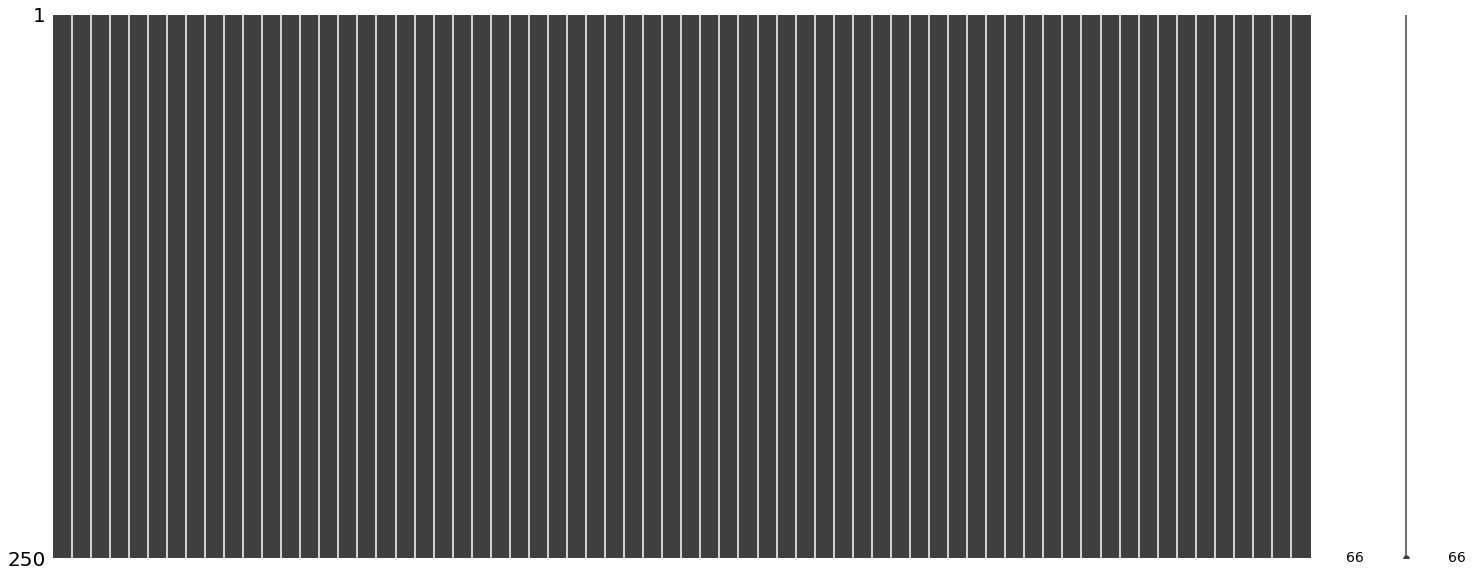

In [82]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

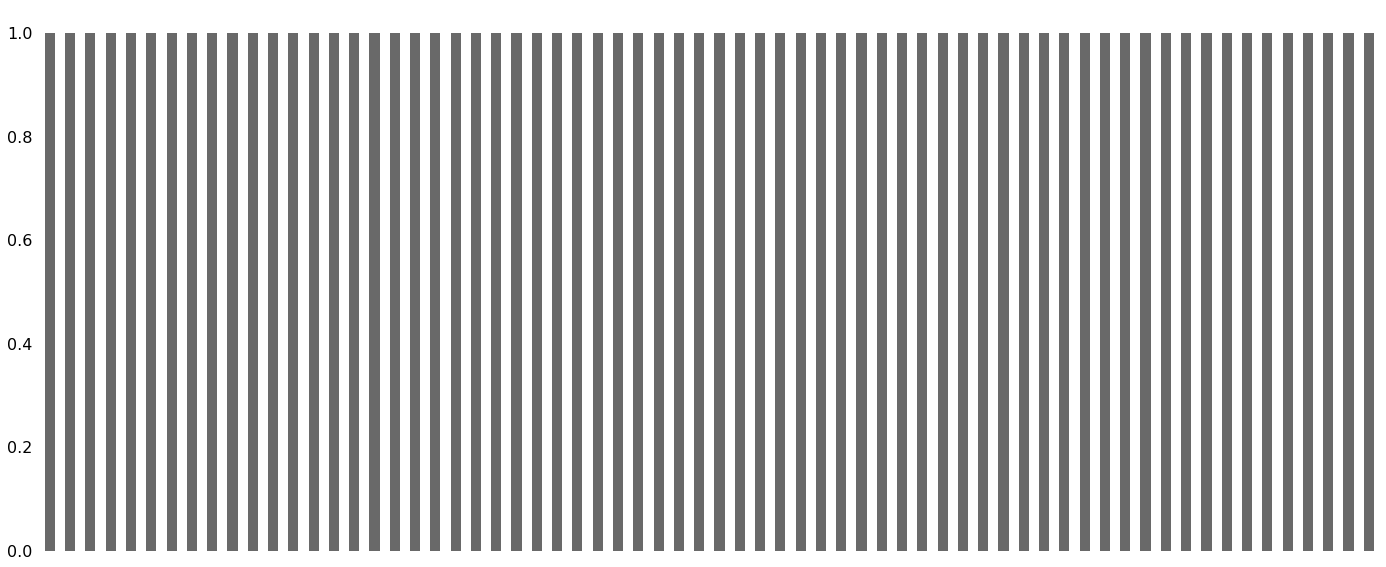

In [83]:
msno.bar(Train_data.sample(1000))

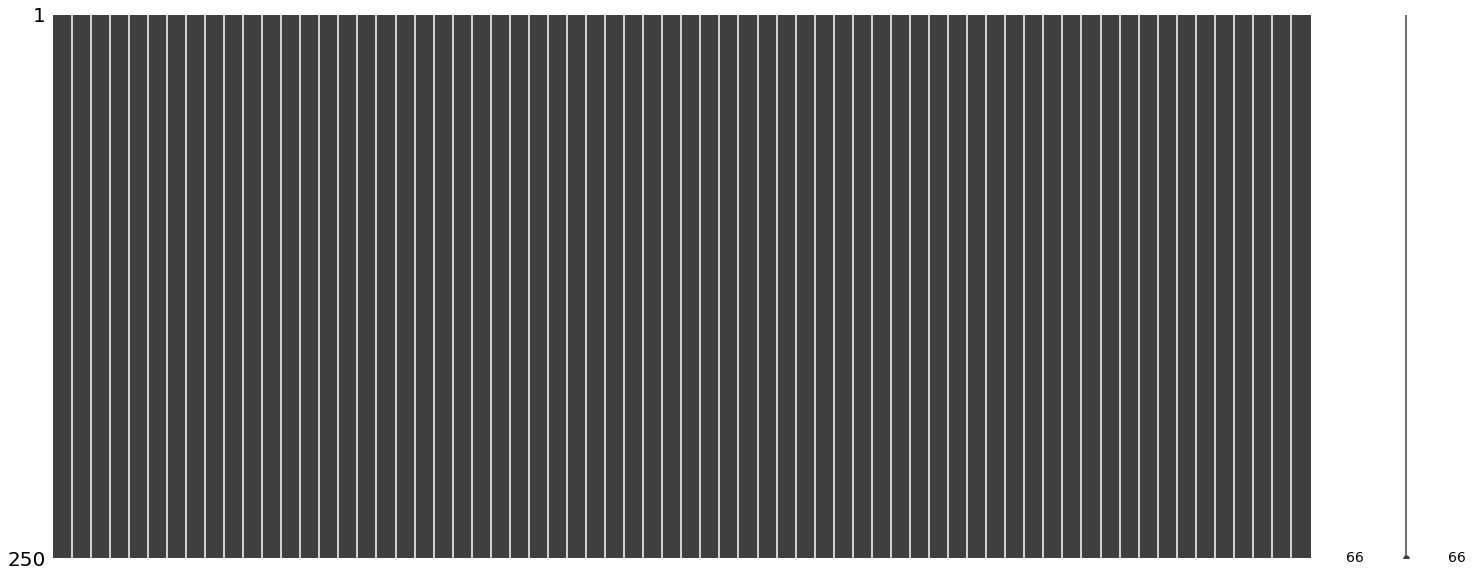

In [84]:
# 可视化看下缺省值
msno.matrix(Test_data.sample(250))

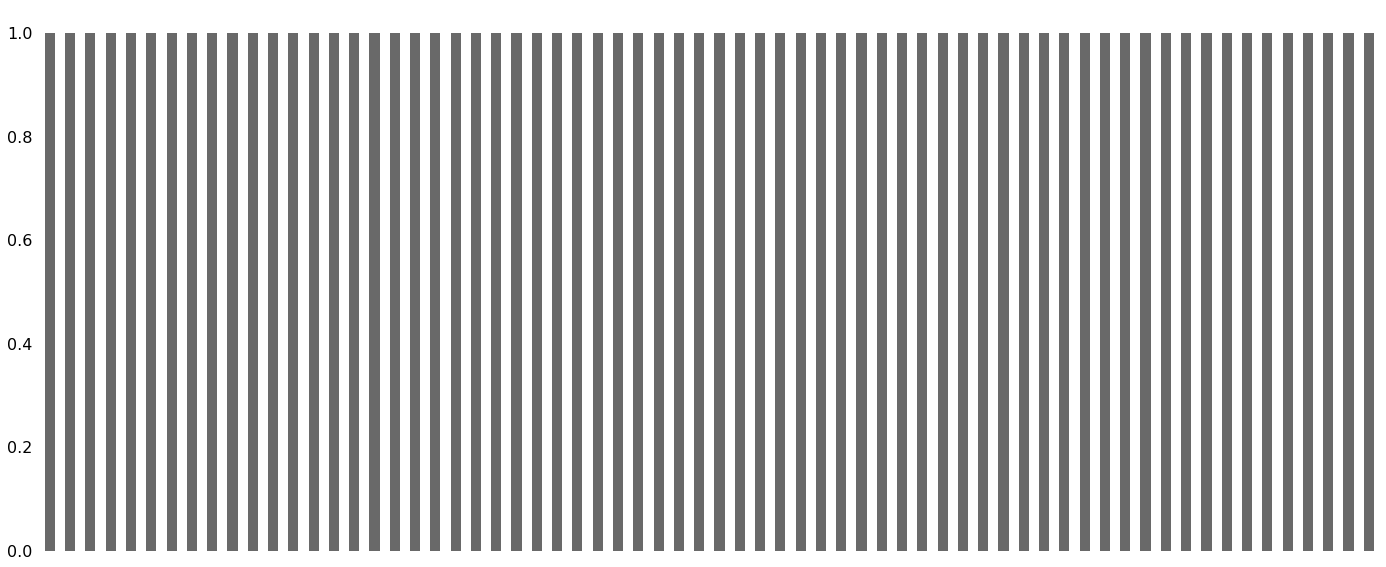

In [85]:
msno.bar(Test_data.sample(1000))

In [86]:
## 2) 查看异常值检测

In [87]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 66 columns):
positiveculture_poe    4048 non-null int64
age                    4048 non-null float64
is_male                4048 non-null int64
race_black             4048 non-null int64
race_white             4048 non-null int64
race_hispanic          4048 non-null int64
race_other             4048 non-null int64
height                 4048 non-null float64
weight                 4048 non-null float64
aniongap_min           4048 non-null int64
aniongap_max           4048 non-null int64
bicarbonate_min        4048 non-null float64
bicarbonate_max        4048 non-null int64
bilirubin_min          4048 non-null float64
bilirubin_max          4048 non-null float64
creatinine_min         4048 non-null float64
creatinine_max         4048 non-null float64
chloride_min           4048 non-null int64
chloride_max           4048 non-null int64
glucose_min            4048 non-null int64
glucose_max      

由于这里没有为object的类型,但是看列名知道,有几个是分类变量:
is_male、race_black、race_white、race_hispanic、race_other、positiveculture_poe

In [108]:
Train_data['positiveculture_poe'].value_counts()

0    3528
1     520
Name: positiveculture_poe, dtype: int64

In [88]:
Train_data['is_male'].value_counts()

1    2241
0    1807
Name: is_male, dtype: int64

In [89]:
Train_data['race_black'].value_counts()

0    3692
1     356
Name: race_black, dtype: int64

In [90]:
Train_data['race_white'].value_counts()

1    2923
0    1125
Name: race_white, dtype: int64

In [91]:
Train_data['race_hispanic'].value_counts()

0    3920
1     128
Name: race_hispanic, dtype: int64

In [92]:
Train_data['race_other'].value_counts()

0    3407
1     641
Name: race_other, dtype: int64

In [94]:
#可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan

In [93]:
Train_data.isnull().sum()

positiveculture_poe    0
age                    0
is_male                0
race_black             0
race_white             0
                      ..
spo2_min               0
spo2_max               0
spo2_mean              0
glucose_mean           0
icu_los                0
Length: 66, dtype: int64

可以删掉一些类别特征非常严重的，对预测没有什么帮助，一般意义不大

## 4.了解预测值的分布

In [95]:
Train_data['icu_los']

0       2.0142
1       2.0708
2       4.2641
3       0.9250
4       8.2287
         ...  
4043    2.5029
4044    5.2939
4045    2.7523
4046    0.6203
4047    1.5299
Name: icu_los, Length: 4048, dtype: float64

In [96]:
Train_data['icu_los'].value_counts()

1.5563     3
0.9748     3
0.9811     3
0.8737     3
0.7088     2
          ..
14.4331    1
6.8398     1
1.2634     1
2.0969     1
1.3750     1
Name: icu_los, Length: 3899, dtype: int64

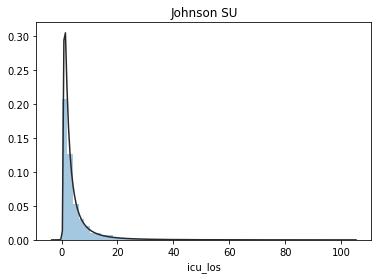

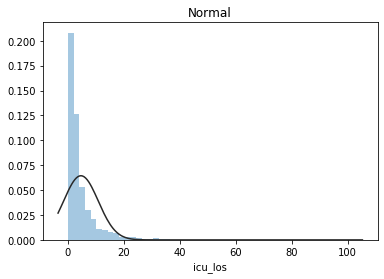

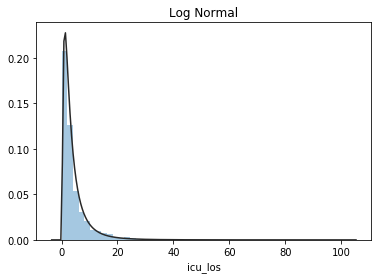

In [97]:
## 1) 总体分布概况（无界约翰逊分布等），恰好预测其住ICU天数拟合无界约翰逊分布
import scipy.stats as st
y = Train_data['icu_los']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 4.567402
Kurtosis: 38.118100


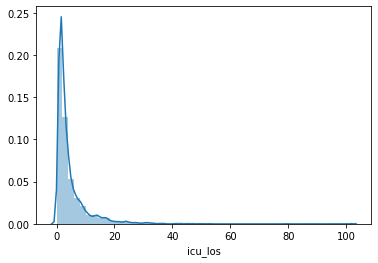

In [99]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['icu_los']);
print("Skewness: %f" % Train_data['icu_los'].skew())
print("Kurtosis: %f" % Train_data['icu_los'].kurt())

In [100]:
Train_data.skew(), Train_data.kurt()

(positiveculture_poe    2.221636
 age                   -0.518409
 is_male               -0.215750
 race_black             2.910926
 race_white            -0.991882
                          ...   
 spo2_min              -4.649521
 spo2_max              -2.795984
 spo2_mean             -3.406714
 glucose_mean           2.126166
 icu_los                4.567402
 Length: 66, dtype: float64, positiveculture_poe     2.937116
 age                    -0.351083
 is_male                -1.954418
 race_black              6.476690
 race_white             -1.016673
                          ...    
 spo2_min               35.381500
 spo2_max               10.701649
 spo2_mean              32.823992
 glucose_mean           10.084613
 icu_los                38.118100
 Length: 66, dtype: float64)

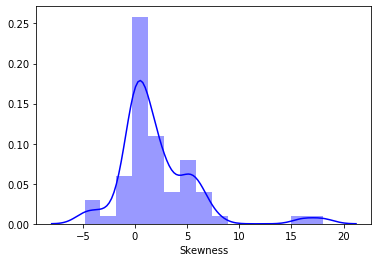

In [101]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

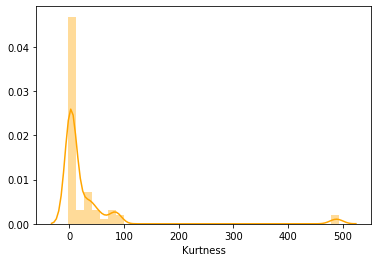

In [102]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

skew、kurt说明参考https://www.cnblogs.com/wyy1480/p/10474046.html

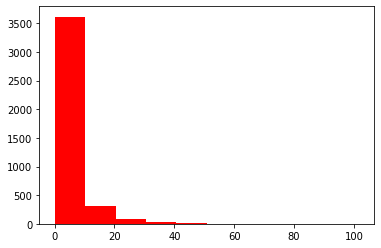

In [104]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['icu_los'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

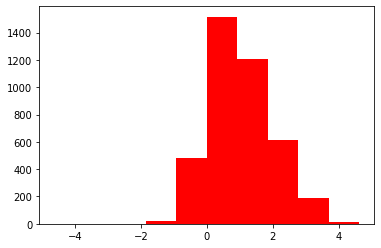

In [105]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['icu_los']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

## 5.特征分为类别特征和数字特征，并对类别特征查看unique分布

### 类别特征：

In [107]:
# 分离label即预测值
Y_train = Train_data['icu_los']

In [ ]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [110]:
numeric_features = ['age', 'height', 'weight', 'aniongap_min', 'aniongap_max', 'bicarbonate_min', 'bicarbonate_max',
                    'bilirubin_min', 'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min', 
                    'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min','hematocrit_max','lactate_min','lactate_max',
                    'platelet_min','platelet_max','potassium_min','potassium_max','ptt_min','ptt_max','inr_min','inr_max','pt_min',
                    'pt_max','sodium_min','sodium_max','bun_min','bun_max','wbc_min','wbc_max','heartrate_min','heartrate_max',
                    'heartrate_mean','sysbp_min','sysbp_max','sysbp_mean','diasbp_min','diasbp_max','diasbp_mean','meanbp_min',
                    'meanbp_max','meanbp_mean','resprate_min','resprate_max','resprate_mean','tempc_min','tempc_max','tempc_mean',
                    'spo2_min','spo2_max','spo2_mean','glucose_mean' ]

categorical_features = ['is_male','race_black','race_white','race_hispanic','race_other','positiveculture_poe']

In [111]:
# 特征nunique分布train
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

is_male的特征分布如下：
is_male特征有个2不同的值
1    2241
0    1807
Name: is_male, dtype: int64
race_black的特征分布如下：
race_black特征有个2不同的值
0    3692
1     356
Name: race_black, dtype: int64
race_white的特征分布如下：
race_white特征有个2不同的值
1    2923
0    1125
Name: race_white, dtype: int64
race_hispanic的特征分布如下：
race_hispanic特征有个2不同的值
0    3920
1     128
Name: race_hispanic, dtype: int64
race_other的特征分布如下：
race_other特征有个2不同的值
0    3407
1     641
Name: race_other, dtype: int64
positiveculture_poe的特征分布如下：
positiveculture_poe特征有个2不同的值
0    3528
1     520
Name: positiveculture_poe, dtype: int64


In [112]:
# 特征nunique分布test
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

is_male的特征分布如下：
is_male特征有个2不同的值
1    982
0    755
Name: is_male, dtype: int64
race_black的特征分布如下：
race_black特征有个2不同的值
0    1588
1     149
Name: race_black, dtype: int64
race_white的特征分布如下：
race_white特征有个2不同的值
1    1271
0     466
Name: race_white, dtype: int64
race_hispanic的特征分布如下：
race_hispanic特征有个2不同的值
0    1668
1      69
Name: race_hispanic, dtype: int64
race_other的特征分布如下：
race_other特征有个2不同的值
0    1489
1     248
Name: race_other, dtype: int64
positiveculture_poe的特征分布如下：
positiveculture_poe特征有个2不同的值
0    1494
1     243
Name: positiveculture_poe, dtype: int64


### 数字特征：

In [113]:
numeric_features.append('icu_los')

In [114]:
numeric_features

['age',
 'height',
 'weight',
 'aniongap_min',
 'aniongap_max',
 'bicarbonate_min',
 'bicarbonate_max',
 'bilirubin_min',
 'bilirubin_max',
 'creatinine_min',
 'creatinine_max',
 'chloride_min',
 'chloride_max',
 'glucose_min',
 'glucose_max',
 'hematocrit_min',
 'hematocrit_max',
 'lactate_min',
 'lactate_max',
 'platelet_min',
 'platelet_max',
 'potassium_min',
 'potassium_max',
 'ptt_min',
 'ptt_max',
 'inr_min',
 'inr_max',
 'pt_min',
 'pt_max',
 'sodium_min',
 'sodium_max',
 'bun_min',
 'bun_max',
 'wbc_min',
 'wbc_max',
 'heartrate_min',
 'heartrate_max',
 'heartrate_mean',
 'sysbp_min',
 'sysbp_max',
 'sysbp_mean',
 'diasbp_min',
 'diasbp_max',
 'diasbp_mean',
 'meanbp_min',
 'meanbp_max',
 'meanbp_mean',
 'resprate_min',
 'resprate_max',
 'resprate_mean',
 'tempc_min',
 'tempc_max',
 'tempc_mean',
 'spo2_min',
 'spo2_max',
 'spo2_mean',
 'glucose_mean',
 'icu_los']

In [115]:
Train_data.head()

,positiveculture_poe,age,is_male,race_black,race_white,race_hispanic,race_other,height,weight,aniongap_min,aniongap_max,bicarbonate_min,bicarbonate_max,bilirubin_min,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,lactate_min,lactate_max,platelet_min,platelet_max,potassium_min,potassium_max,ptt_min,ptt_max,inr_min,inr_max,pt_min,pt_max,sodium_min,sodium_max,bun_min,bun_max,wbc_min,wbc_max,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,diasbp_max,diasbp_mean,meanbp_min,meanbp_max,meanbp_mean,resprate_min,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_mean,icu_los
0,0,45.7505,1,0,0,0,1,178.00,250.0,11,16,25.0,27,2.9,5.9,0.8,0.9,101,103,220,237,47.4,49.8,17.5,18.2,1.8,4.4,177,253,3.8,4.0,24.2,24.2,1.2,1.2,14.2,14.2,137,138,12,15,14.0,15.6,89,106,98.260870,128.0,156,145.850000,78,96,88.850000,90,109,101.900000,19,29,24.347826,37.666667,38.555556,38.101852,92,96,94.695652,196.7,2.0142
1,0,83.6432,0,0,1,0,0,160.00,58.1,15,16,15.0,17,4.9,4.9,0.7,0.9,106,108,72,108,31.7,32.5,11.2,11.4,1.4,2.1,131,140,3.0,4.8,45.0,95.0,3.4,5.4,33.1,46.9,132,137,12,15,30.7,30.7,62,91,77.076923,83.0,169,108.500000,33,79,51.148148,49,113,69.000000,11,33,21.135135,36.055556,36.500000,36.314815,96,100,98.558824,90.0,2.0708
2,0,64.3080,1,0,1,0,0,177.80,95.1,8,12,22.0,24,0.7,0.7,0.6,0.8,108,112,96,226,30.7,42.4,10.5,14.3,1.4,2.2,152,216,3.8,4.0,134.8,150.0,1.8,2.5,42.0,51.3,138,140,31,36,10.9,12.3,81,143,121.586207,74.0,129,100.925926,38,88,60.666667,51,94,70.407407,15,40,24.212121,36.222222,37.444444,37.027778,90,99,94.310345,170.0,4.2641
3,1,56.5050,1,0,1,0,0,182.88,113.4,14,16,27.0,28,0.8,0.9,1.4,1.7,94,105,85,135,36.8,40.0,13.2,14.2,0.9,1.3,145,174,3.9,4.3,23.5,24.5,1.0,1.1,11.8,12.8,134,143,31,40,9.2,10.8,46,73,64.227273,91.0,179,113.761905,49,144,67.238095,59,153,78.047619,9,23,16.954545,37.277778,37.388889,37.333333,91,100,95.454545,135.5,0.9250
4,1,69.3102,0,0,1,0,0,165.10,101.0,13,13,26.0,26,0.9,0.9,0.5,0.7,102,103,137,163,34.7,41.0,12.4,13.6,1.3,1.3,184,251,3.3,3.5,22.9,33.5,1.1,1.5,13.2,17.1,138,141,10,16,13.0,16.0,50,71,60.692308,126.0,178,148.270270,40,58,49.621622,62,83,72.837838,15,25,20.700000,36.611111,38.111111,37.475309,95,100,98.974359,134.0,8.2287


In [116]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['icu_los'].sort_values(ascending = False),'\n')

icu_los            1.000000
resprate_mean      0.140679
tempc_max          0.126606
meanbp_max         0.114029
heartrate_max      0.112895
resprate_max       0.106232
heartrate_mean     0.102127
tempc_mean         0.091670
heartrate_min      0.089084
sysbp_max          0.089042
hematocrit_max     0.087682
ptt_max            0.080583
lactate_max        0.077576
sodium_max         0.072633
weight             0.072018
meanbp_mean        0.067524
resprate_min       0.065359
aniongap_max       0.062566
spo2_max           0.052036
chloride_max       0.050949
glucose_max        0.048654
glucose_mean       0.042394
bun_max            0.041009
diasbp_max         0.040158
wbc_max            0.038404
spo2_mean          0.036885
potassium_max      0.032521
height             0.030908
bun_min            0.030639
hematocrit_min     0.026546
creatinine_max     0.026495
bilirubin_max      0.023523
diasbp_mean        0.022035
glucose_min        0.017073
pt_max             0.012515
ptt_min            0

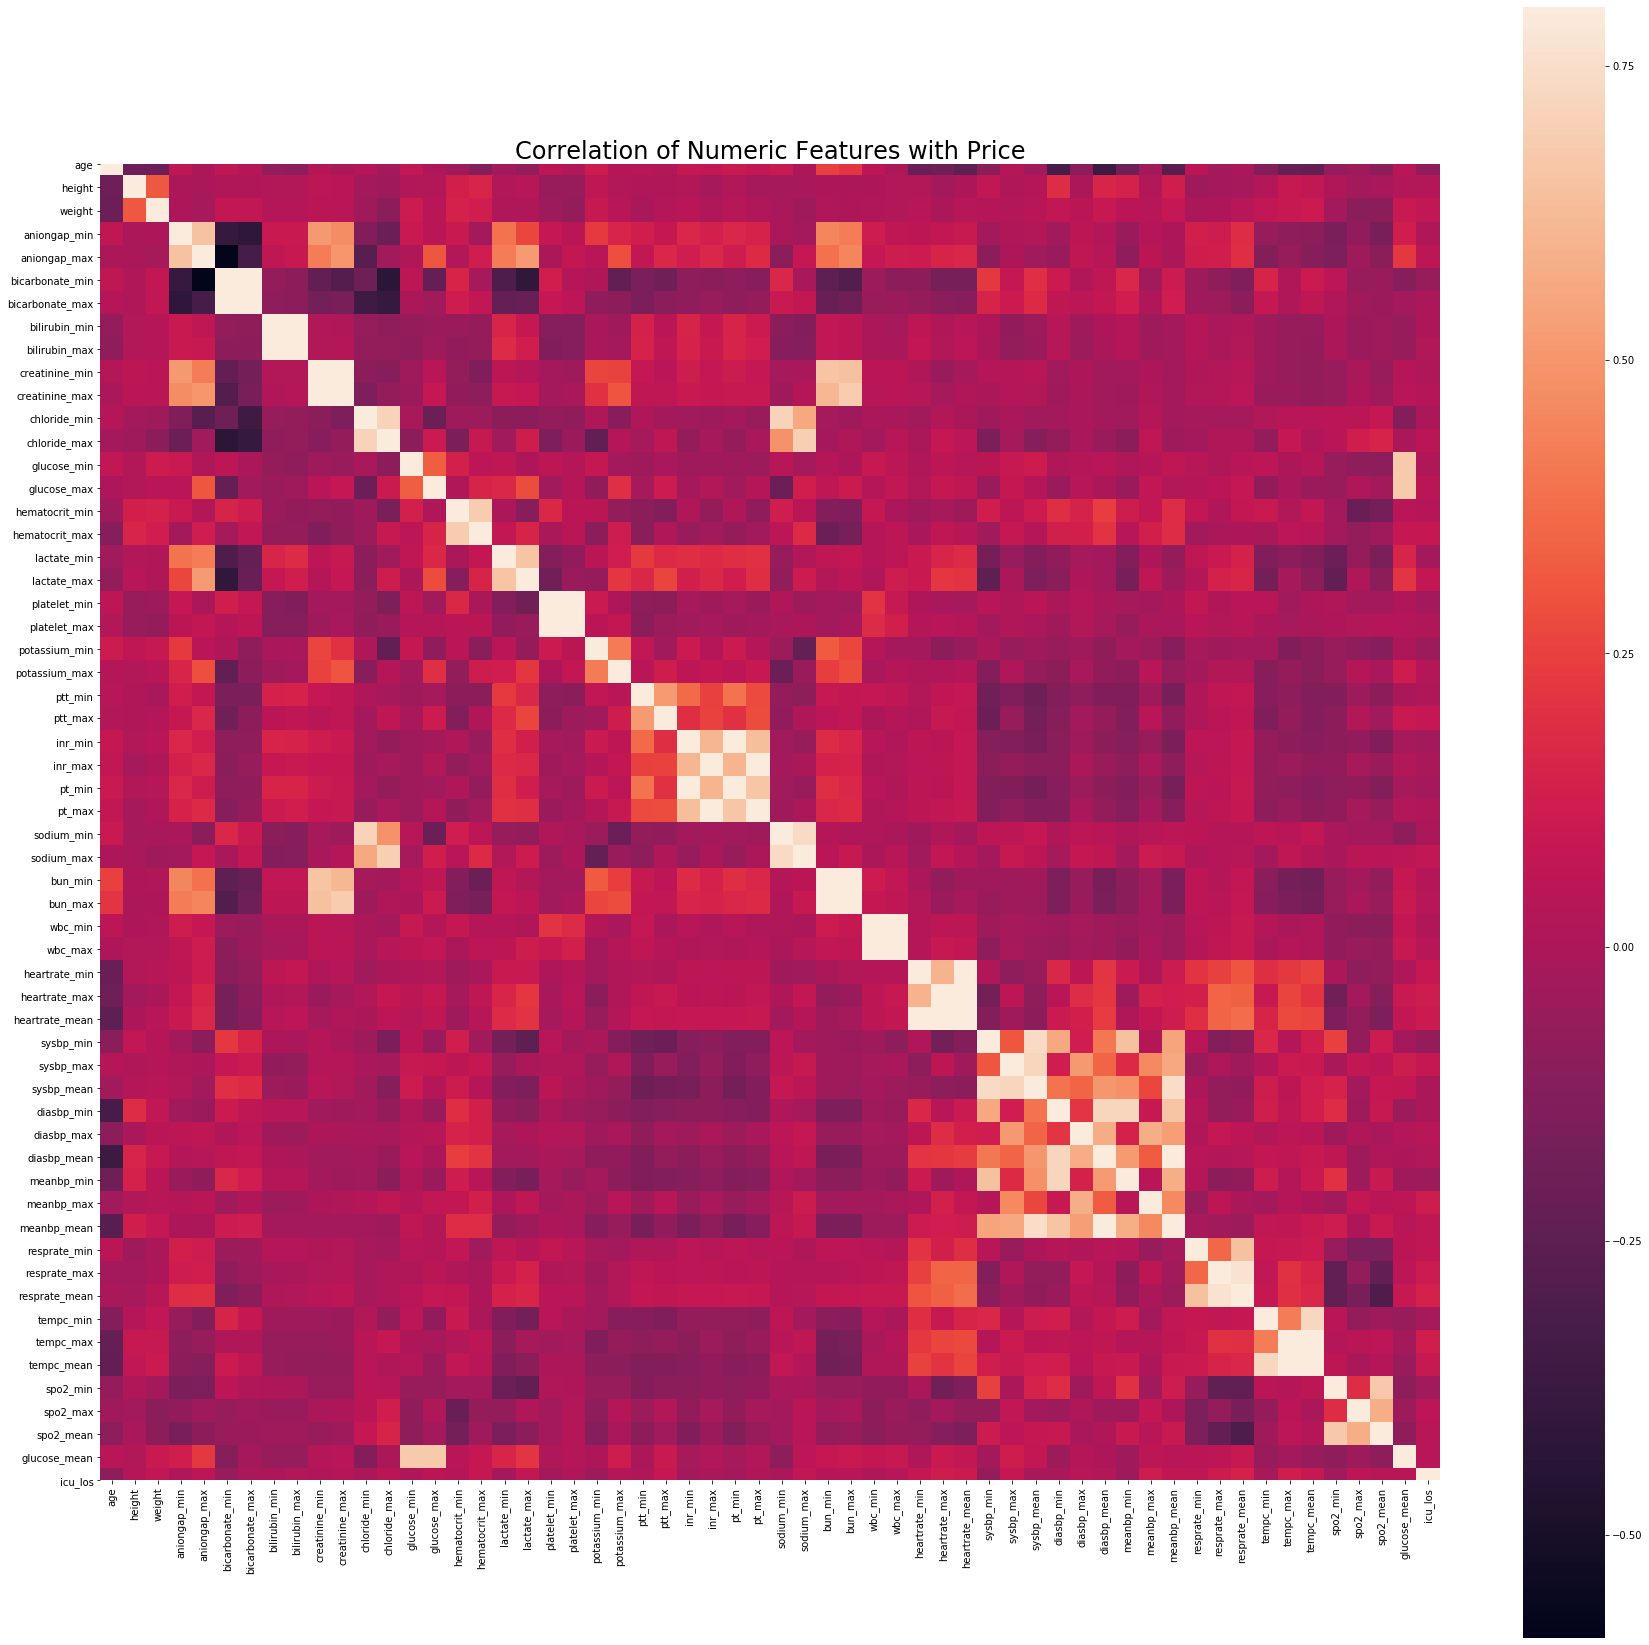

In [121]:
f , ax = plt.subplots(figsize = (30, 30))

plt.title('Correlation of Numeric Features with Price',y=1,size=24)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [122]:
del price_numeric['icu_los']

In [123]:
## 2) 查看几个特征得 偏度和峰值
# Skewness:是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，简单来说就是数据的不对称程度。偏度是三阶中心距计算出来的。
# Kurtosis:偏度是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的尖锐程度。
峰度是四阶标准矩计算出来的。
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

age             Skewness: -0.52     Kurtosis: -00.35
height          Skewness: 00.09     Kurtosis: 001.21
weight          Skewness: 05.21     Kurtosis: 090.58
aniongap_min    Skewness: 01.14     Kurtosis: 003.35
aniongap_max    Skewness: 01.69     Kurtosis: 005.31
bicarbonate_min Skewness: -0.03     Kurtosis: 001.15
bicarbonate_max Skewness: 00.45     Kurtosis: 001.91
bilirubin_min   Skewness: 06.44     Kurtosis: 056.11
bilirubin_max   Skewness: 05.80     Kurtosis: 046.14
creatinine_min  Skewness: 04.36     Kurtosis: 031.95
creatinine_max  Skewness: 04.64     Kurtosis: 037.71
chloride_min    Skewness: -0.80     Kurtosis: 004.93
chloride_max    Skewness: 00.30     Kurtosis: 002.94
glucose_min     Skewness: 01.77     Kurtosis: 006.67
glucose_max     Skewness: 05.94     Kurtosis: 074.92
hematocrit_min  Skewness: 00.09     Kurtosis: 000.26
hematocrit_max  Skewness: 00.44     Kurtosis: 000.31
lactate_min     Skewness: 04.00     Kurtosis: 027.71
lactate_max     Skewness: 03.21     Kurtosis: 

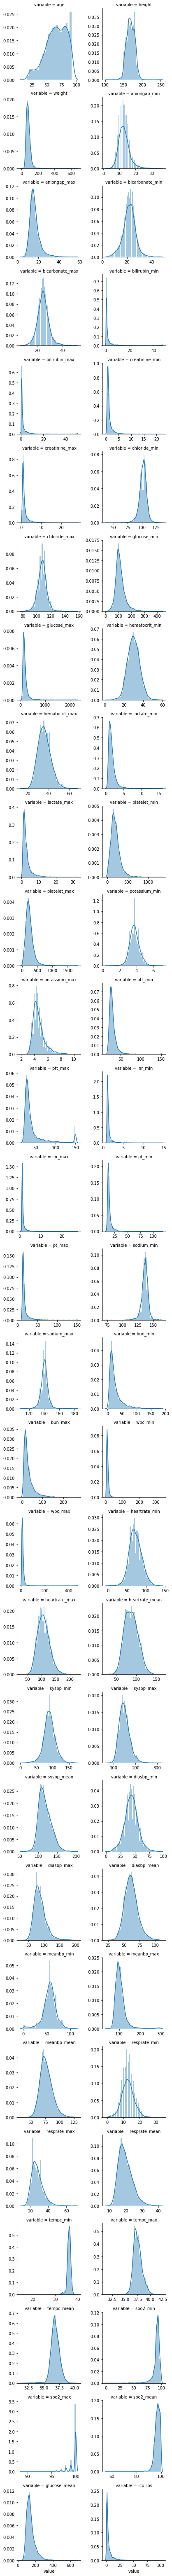

In [124]:
## 3) 每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['icu_los', 'age', 'height', 'weight', 'aniongap_min', 'aniongap_max', 'bicarbonate_min', 'bicarbonate_max',
                    'bilirubin_min', 'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min', 
                    'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min','hematocrit_max','lactate_min','lactate_max',
                    'platelet_min','platelet_max','potassium_min','potassium_max','ptt_min','ptt_max','inr_min','inr_max','pt_min',
                    'pt_max','sodium_min','sodium_max','bun_min','bun_max','wbc_min','wbc_max','heartrate_min','heartrate_max',
                    'heartrate_mean','sysbp_min','sysbp_max','sysbp_mean','diasbp_min','diasbp_max','diasbp_mean','meanbp_min',
                    'meanbp_max','meanbp_mean','resprate_min','resprate_max','resprate_mean','tempc_min','tempc_max','tempc_mean',
                    'spo2_min','spo2_max','spo2_mean','glucose_mean']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()
# 很多图片，超过25M上传限制了

In [126]:
Train_data.columns

Index(['positiveculture_poe', 'age', 'is_male', 'race_black', 'race_white',
       'race_hispanic', 'race_other', 'height', 'weight', 'aniongap_min',
       'aniongap_max', 'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min',
       'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min',
       'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min',
       'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 'lactate_min',
       'lactate_max', 'platelet_min', 'platelet_max', 'potassium_min',
       'potassium_max', 'ptt_min', 'ptt_max', 'inr_min', 'inr_max', 'pt_min',
       'pt_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'wbc_min',
       'wbc_max', 'heartrate_min', 'heartrate_max', 'heartrate_mean',
       'sysbp_min', 'sysbp_max', 'sysbp_mean', 'diasbp_min', 'diasbp_max',
       'diasbp_mean', 'meanbp_min', 'meanbp_max', 'meanbp_mean',
       'resprate_min', 'resprate_max', 'resprate_mean', 'tempc_min',
       'tempc_max', 'tempc_mean', 'spo2_min

In [127]:
Y_train

0       2.0142
1       2.0708
2       4.2641
3       0.9250
4       8.2287
         ...  
4043    2.5029
4044    5.2939
4045    2.7523
4046    0.6203
4047    1.5299
Name: icu_los, Length: 4048, dtype: float64

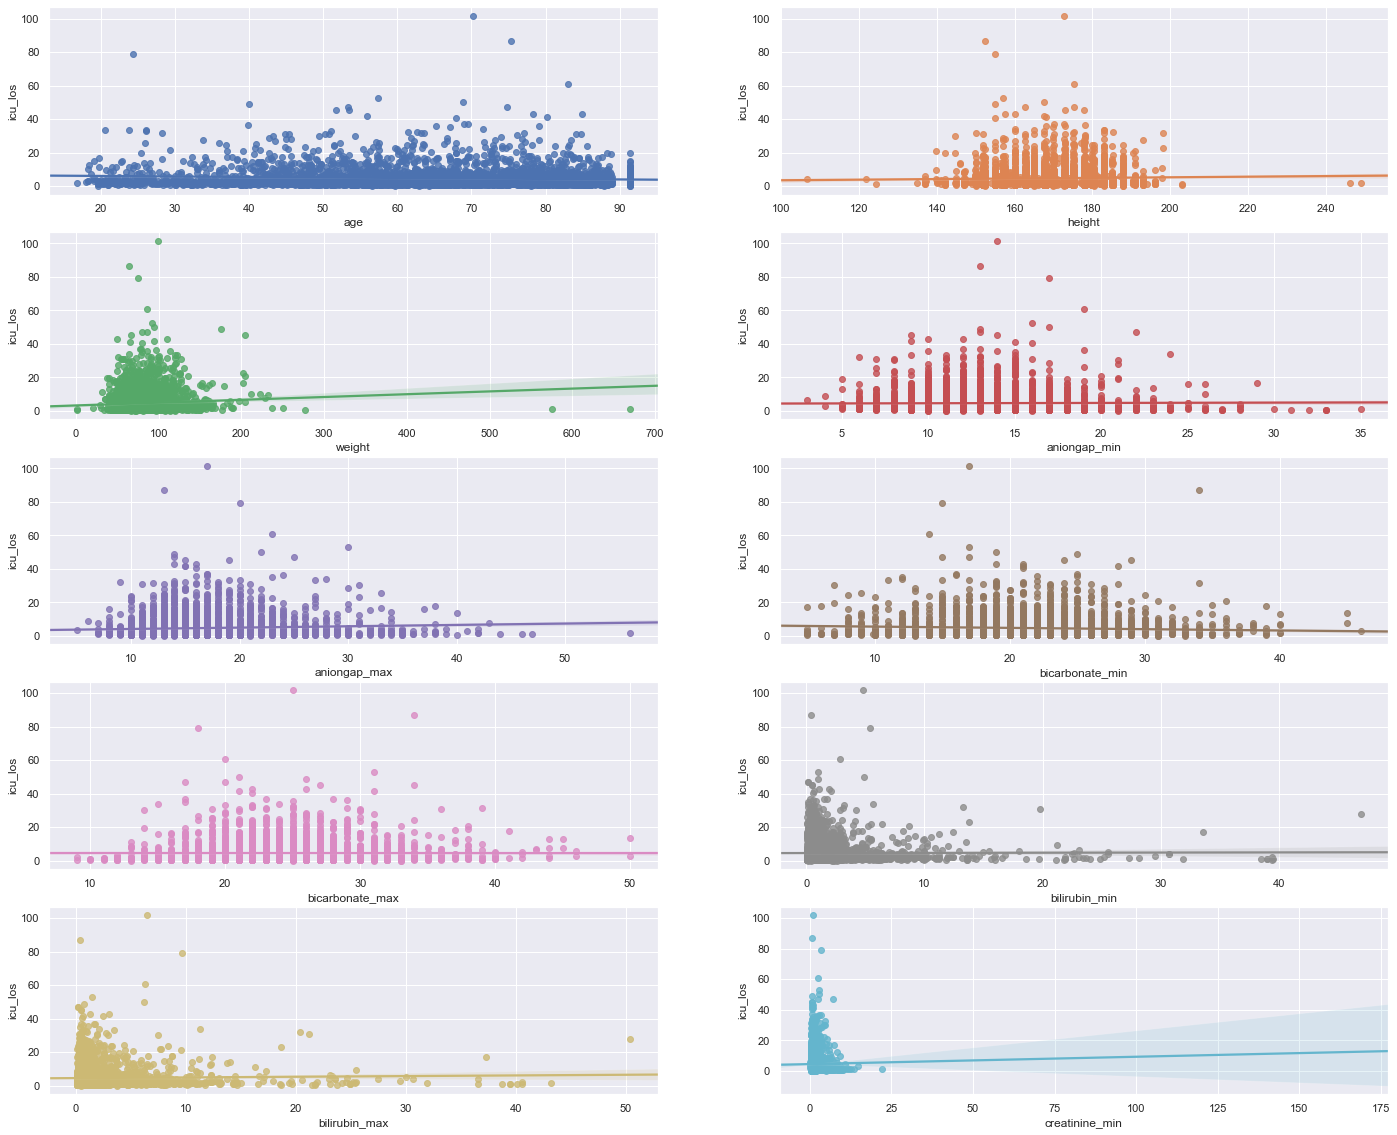

In [129]:
## 5) 多变量互相回归关系可视化,列举前十个
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
age_scatter_plot = pd.concat([Y_train,Train_data['age']],axis = 1)
sns.regplot(x='age',y = 'icu_los', data = age_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

height_scatter_plot = pd.concat([Y_train,Train_data['height']],axis = 1)
sns.regplot(x='height',y = 'icu_los',data = height_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

weight_scatter_plot = pd.concat([Y_train,Train_data['weight']],axis = 1)
sns.regplot(x='weight',y = 'icu_los',data = weight_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

aniongap_min_scatter_plot = pd.concat([Y_train,Train_data['aniongap_min']],axis = 1)
sns.regplot(x='aniongap_min',y = 'icu_los',data = aniongap_min_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

aniongap_max_scatter_plot = pd.concat([Y_train,Train_data['aniongap_max']],axis = 1)
sns.regplot(x='aniongap_max',y = 'icu_los',data = aniongap_max_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

bicarbonate_min_scatter_plot = pd.concat([Y_train,Train_data['bicarbonate_min']],axis = 1)
sns.regplot(x='bicarbonate_min',y = 'icu_los',data = bicarbonate_min_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

bicarbonate_max_scatter_plot = pd.concat([Y_train,Train_data['bicarbonate_max']],axis = 1)
sns.regplot(x='bicarbonate_max',y = 'icu_los',data = bicarbonate_max_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

bilirubin_min_scatter_plot = pd.concat([Y_train,Train_data['bilirubin_min']],axis = 1)
sns.regplot(x='bilirubin_min',y = 'icu_los',data = bilirubin_min_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

bilirubin_max_scatter_plot = pd.concat([Y_train,Train_data['bilirubin_max']],axis = 1)
sns.regplot(x='bilirubin_max',y = 'icu_los',data = bilirubin_max_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

creatinine_min_scatter_plot = pd.concat([Y_train,Train_data['creatinine_min']],axis = 1)
sns.regplot(x='creatinine_min',y = 'icu_los',data = creatinine_min_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


## 类别特征分析

In [130]:
## 1) unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

2
2
2
2
2
2


In [131]:
categorical_features

['is_male',
 'race_black',
 'race_white',
 'race_hispanic',
 'race_other',
 'positiveculture_poe']

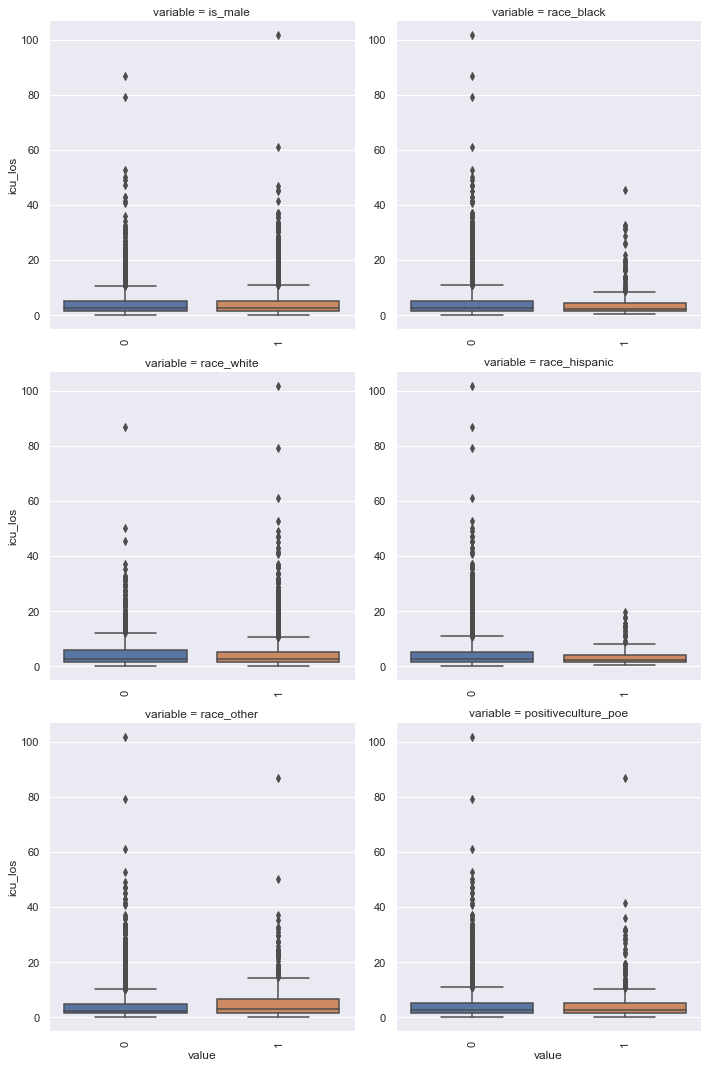

In [133]:
## 2) 类别特征箱形图可视化
categorical_features = ['is_male','race_black','race_white','race_hispanic','race_other','positiveculture_poe']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['icu_los'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "icu_los")

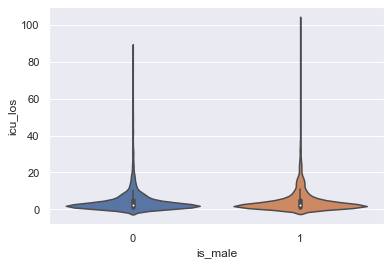

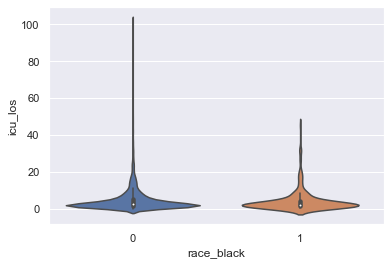

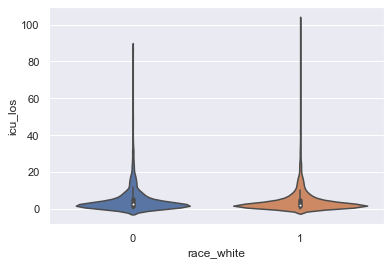

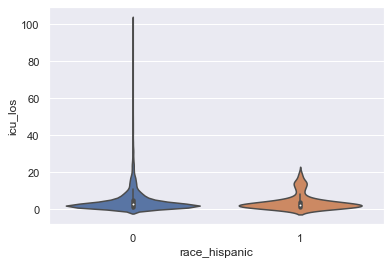

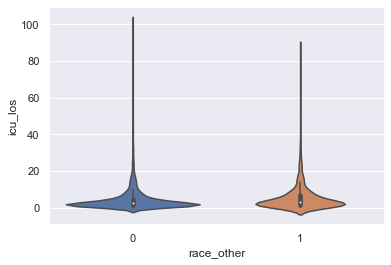

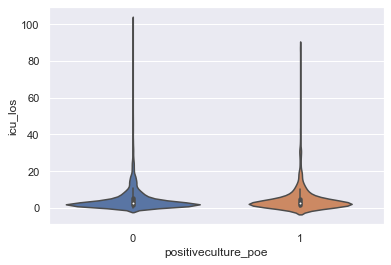

In [134]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'icu_los'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

In [135]:
categorical_features = ['is_male','race_black','race_white','race_hispanic','race_other','positiveculture_poe']

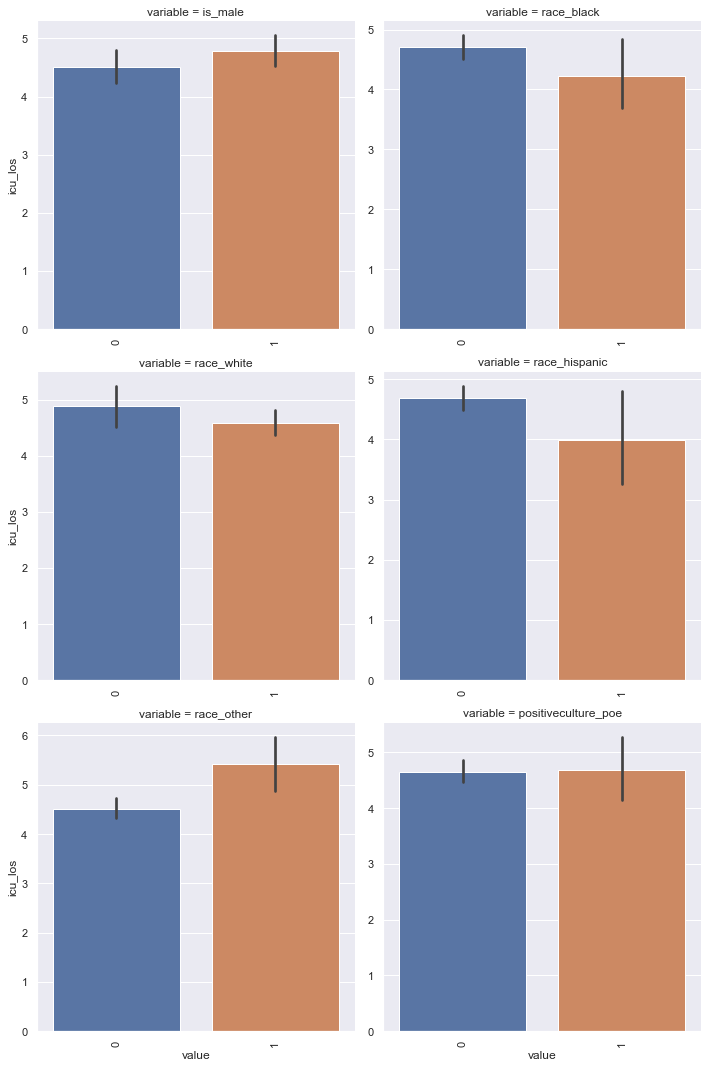

In [137]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['icu_los'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "icu_los")

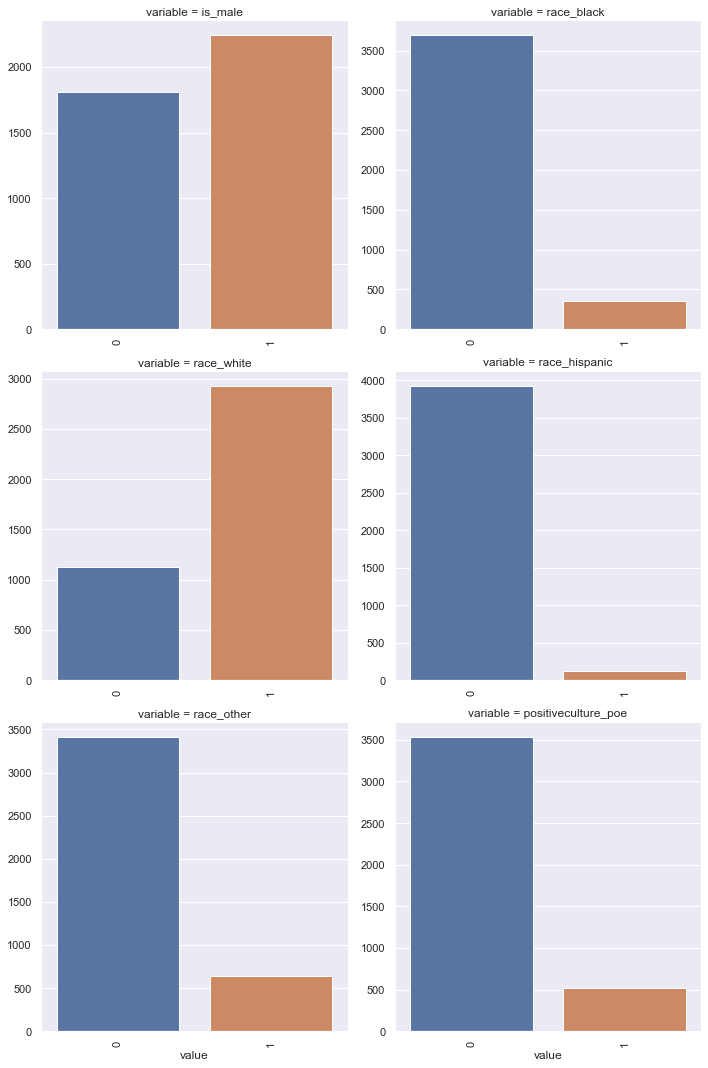

In [138]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

# 用pandas_profiling生成数据报告

In [139]:
import pandas_profiling

In [140]:
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./e-lab.html")

总结：这次学习，对于数据探索有了一些新的体会，了解了基础的数据探索，并不只限于处理缺失值。
* 对于缺失或许后面模型运用树之类可以暂不处理，单独放在另外一边。
* 根据数据类型，把需要处理可以根据数据的特点分为两类来处理：数字类型、类别类型。
* 对于类别类型数据，可以做专门的分析，观察分布的情况
* 对于数字类型数据，做数据的峰度、偏度来了解分布情况
* 虽然还不了解峰度和偏度对后面特征工程的和设计模型有些什么影响，未完待续跟着Datawhale下一次打卡学习...